## Setup

In [2]:
!pip install alpaca-trade-api
!pip install alpaca-backtrader-api
!pip install backtrader
!pip install --upgrade backtrader
!pip install statsmodels --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.1/410.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.0/123.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [3]:
import alpaca_trade_api as alpaca
import alpaca_backtrader_api as alpaca_backtest
import time
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


ModuleNotFoundError: No module named 'alpaca_backtrader_api'

In [ ]:
key = 'PK5DSEQFYZ3C7Q32LT7Q'
secret_key = 'sxX1VhQLlfNM9yqTaKV1YjGlHwQiImklGoqFCFjQ'
endpoint = "https://paper-api.alpaca.markets"
api = alpaca.REST(key, secret_key, endpoint, api_version='v2')

##Alpaca

In [ ]:
account = api.get_account()
order_id = 1


In [ ]:
aapl = api.get_barset('AAPL', 'day')
aapl.df.head()

AAPL                                   
                             open    high      low   close    volume
time                                                                
2021-06-14 00:00:00-04:00  127.82  130.49  127.070  130.49  73169843
2021-06-15 00:00:00-04:00  129.88  130.60  129.390  129.74  53587032
2021-06-16 00:00:00-04:00  130.29  130.89  128.461  130.14  81577235
2021-06-17 00:00:00-04:00  129.80  132.55  129.650  131.78  82434812
2021-06-18 00:00:00-04:00  130.65  131.51  130.240  130.40  78114203

###Placing orders

In [ ]:
api.submit_order(symbol='AAPL',
		qty=1,
		side='buy',
		time_in_force='gtc',
		type='market')
time.sleep(2)
position = api.get_position('AAPL')
position

Position({   'asset_class': 'us_equity',
    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'asset_marginable': True,
    'avg_entry_price': '149.9',
    'change_today': '0.0069197178367484',
    'cost_basis': '149.9',
    'current_price': '149.88',
    'exchange': 'NASDAQ',
    'lastday_price': '148.85',
    'market_value': '149.88',
    'qty': '1',
    'side': 'long',
    'symbol': 'AAPL',
    'unrealized_intraday_pl': '-0.02',
    'unrealized_intraday_plpc': '-0.000133422281521',
    'unrealized_pl': '-0.02',
    'unrealized_plpc': '-0.000133422281521'})

In [ ]:
total_qnt = api.get_position('AAPL').qty

api.submit_order(symbol='AAPL',
		qty=total_qnt,
		side='sell',
		time_in_force='gtc',
		type='market')
time.sleep(2)


In [ ]:
MA = aapl.df.AAPL.close.rolling(20).mean().tail()
STD = aapl.df.AAPL.close.rolling(20).std().tail()
MA

time
2021-10-27 00:00:00-04:00    144.79677
2021-10-28 00:00:00-04:00    145.35460
2021-10-29 00:00:00-04:00    145.71160
2021-11-01 00:00:00-04:00    146.20160
2021-11-02 00:00:00-04:00    146.64660
Name: close, dtype: float64

In [ ]:
today_MA = MA[len(MA)-1]
today_STD = STD[len(STD)-1]

print("Moving Average: " + str(today_MA) + "\nStd: " + str(today_STD))

Moving Average: 146.64660000000003
Std: 3.4963616090234204


In [ ]:

api.submit_order(symbol='AAPL',
		qty=1,
		side='buy',
		time_in_force='gtc',
		type='limit',
    limit_price = today_MA,
		order_class='bracket',
		stop_loss=dict(stop_price=stop_l),
		take_profit=dict(limit_price=take_p))
;

''

In [ ]:
api.submit_order(symbol='AAPL',
		qty=1,
		side='buy',
		time_in_force='gtc',
		type='limit',
		limit_price=today_MA,
		order_class='bracket',
		stop_loss=dict(stop_price=stop_l),
		take_profit=dict(limit_price=take_p))

Order({   'asset_class': 'us_equity',
    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'canceled_at': None,
    'client_order_id': '3079dbe6-658f-42fb-895a-d3ad7d629c47',
    'created_at': '2021-11-02T13:49:15.093301537Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '9e411db3-3e5e-4293-b6a1-54cbdf17b619',
    'legs': [   {   'asset_class': 'us_equity',
                    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
                    'canceled_at': None,
                    'client_order_id': '706d8f4f-825a-49d0-845a-189a08f1ab15',
                    'created_at': '2021-11-02T13:49:15.093389587Z',
                    'expired_at': None,
                    'extended_hours': False,
                    'failed_at': None,
                    'filled_at': None,
                    'filled_avg_price': None,
                    'filled_qt

###Bollinger Bands strat

In [ ]:
aapl = api.get_barset('AAPL', 'day')
aapl.df.tail()

AAPL                                        
                              open     high       low     close     volume
time                                                                      
2021-10-27 00:00:00-04:00  149.380  149.730  148.4900  148.8500   43201783
2021-10-28 00:00:00-04:00  149.860  153.165  149.7200  152.4766   77772052
2021-10-29 00:00:00-04:00  147.190  149.940  146.4128  149.8000  104258290
2021-11-01 00:00:00-04:00  148.985  149.700  147.8000  148.9900   57758481
2021-11-02 00:00:00-04:00  148.670  151.570  148.6500  150.9850   44240762

In [ ]:
MA = aapl.df.AAPL.close.rolling(20).mean().tail()
STD = aapl.df.AAPL.close.rolling(20).std().tail()

today_MA = MA[len(MA)-1]
today_STD = STD[len(STD)-1]

curr_price = aapl.df.AAPL.close[-1]

print("Curr price: " + str(curr_price))

print("Moving Average: " + str(today_MA) + "\nStd: " + str(today_STD))
upper_band = today_MA + (today_STD*2)
lower_band = today_MA - (today_STD*2)
print("Upper Band: " + str(upper_band) + ", Lower Band: " + str(lower_band))


Curr price: 150.985
Moving Average: 146.69585000000004
Std: 3.5525695464876947
Upper Band: 153.8009890929754, Lower Band: 139.59071090702466


In [ ]:
accnt_balance = float (api.get_account().buying_power)
weight = 0.10
quantity = int((accnt_balance * weight) / curr_price)

if(curr_price>upper_band):

  api.submit_order(symbol='AAPL',
		qty=quantity,
		side='sell',
		time_in_force='gtc',
		type='limit',
		limit_price=curr_price)


elif (curr_price < lower_band):
  api.submit_order(symbol='AAPL',
		qty=quantity,
		side='buy',
		time_in_force='gtc',
		type='limit',
		limit_price=curr_price)
  print("bought", quantity, "shares")

else:
  print("Between Thresholds, do nothing")



sold 11 shares


## Linear Reg Modeling

Auto Regression (10) Yash Sharma

In [ ]:
'''
GET DATA
Connecting to server for stock price data
'''
key = 'PK5DSEQFYZ3C7Q32LT7Q'
secret_key = 'sxX1VhQLlfNM9yqTaKV1YjGlHwQiImklGoqFCFjQ'
endpoint = "https://paper-api.alpaca.markets"
api = alpaca.REST(key, secret_key, endpoint, api_version='v2')
# account = api.get_account()
order_id = 1

'''
Getting daily apple data post stock split in 2020 :)
'''
aapl = api.get_bars('AAPL', alpaca.rest.TimeFrame.Day, '2020-09-09', '2021-11-01', adjustment='raw')
aapl.df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-09-09 04:00:00+00:00,117.30,119.140,115.2600,117.320,176969416,1308850,117.415621
2020-09-10 04:00:00+00:00,120.37,120.500,112.5000,113.420,182314907,1444582,116.045166
2020-09-11 04:00:00+00:00,114.68,115.230,110.0000,112.000,180861505,1405593,112.042042
2020-09-14 04:00:00+00:00,114.78,115.930,112.8000,115.355,140153151,1013529,114.579470
2020-09-15 04:00:00+00:00,118.38,118.829,113.6100,115.540,184699355,1290608,116.418682
...,...,...,...,...,...,...,...
2021-10-26 04:00:00+00:00,149.33,150.840,149.0101,149.320,60332588,454831,149.591198
2021-10-27 04:00:00+00:00,149.32,149.730,148.4900,148.850,55623366,403046,149.119103
2021-10-28 04:00:00+00:00,149.72,153.165,149.7200,152.570,99567181,745271,151.590102


In [ ]:
'''
CLEAN DATA
Copying Series, making timestamp into its own index w/in a new data frame
'''
closers = aapl.df['close'].copy()
closers = closers.reset_index(level=0, inplace=False) # creates new col for timestamp
closers

,timestamp,close
0,2020-09-09 04:00:00+00:00,117.320
1,2020-09-10 04:00:00+00:00,113.420
2,2020-09-11 04:00:00+00:00,112.000
3,2020-09-14 04:00:00+00:00,115.355
4,2020-09-15 04:00:00+00:00,115.540
...,...,...
285,2021-10-26 04:00:00+00:00,149.320
286,2021-10-27 04:00:00+00:00,148.850
287,2021-10-28 04:00:00+00:00,152.570
288,2021-10-29 04:00:00+00:00,149.800


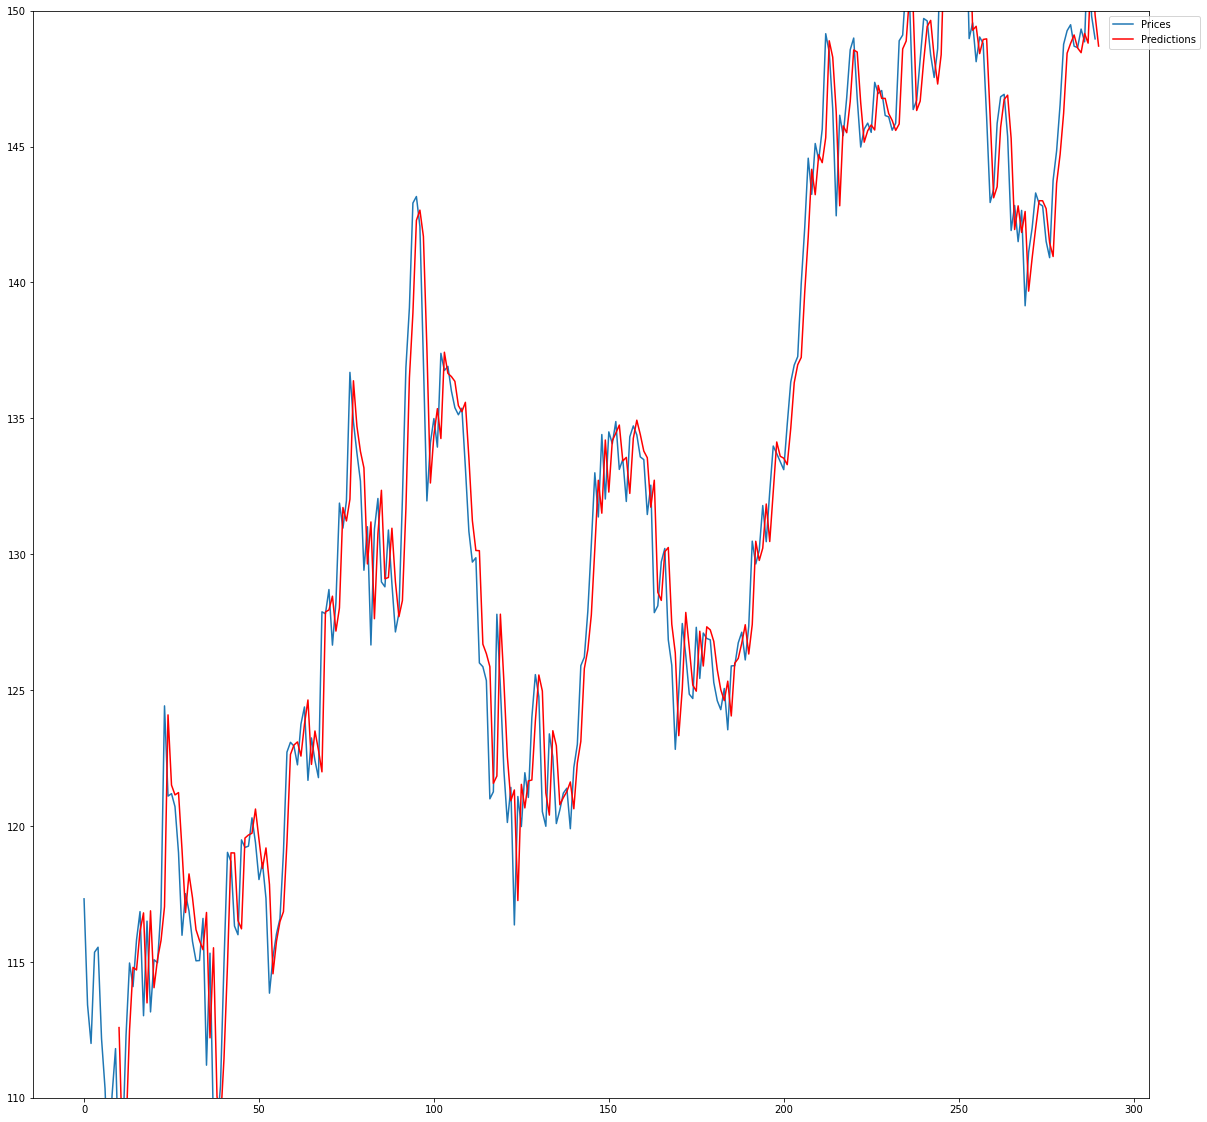

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = AutoReg(closers['close'], lags=10)
model = model.fit()

predictions = model.predict(start=0, end=len(closers['close']), dynamic=False)

plt.figure(figsize=(20,20))
plt.plot(closers['close'], label='Prices')
plt.ylim(110,150)

plt.plot(predictions, label='Predictions', color='r')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

## Backtesting

In [ ]:
fromdate = datetime.datetime(2020,8,5)
todate = datetime.datetime(2020,8,10)

tickers = ['SPY']
timeframes = {
    '30Min':30,
}

In [ ]:
class RSIStack(bt.Strategy):
  def next(self):
    print("IN")
    self.buy()
    for i in range(0,len(self.datas)):
        print(f'{self.datas[i].datetime.datetime(ago=0)} \
        {self.datas[i].p.dataname}: OHLC: \
              o:{self.datas[i].open[0]} \
              h:{self.datas[i].high[0]} \
              l:{self.datas[i].low[0]} \
              c:{self.datas[i].close[0]} \
              v:{self.datas[i].volume[0]}' )

cerebro = bt.Cerebro()
cerebro.addstrategy(RSIStack)
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(commission=0.0)


In [ ]:
 from pathlib import Path

 # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
datapath = os.path.join(modpath, '/orcl-1995-2014.csv')
print("path: ", datapath)
# Create a Data Feed
data = bt.feeds.GenericCSVData (dataname='filename.csv', dtformat=1,
    # Do not pass values before this date
    fromdate=datetime.datetime(2000, 1, 1),
    # Do not pass values after this date
    todate=datetime.datetime(2000, 12, 31),
    reverse=False)
cerebro.adddata(data)



path:  /orcl-1995-2014.csv


In [ ]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print(cerebro.broker.positions.keys())
cerebro.plot()

Starting Portfolio Value: 100000.00


FileNotFoundError: ignored